# Visualizaciones en Python - Desafío 2- Curso Data Science - CoderHouse

**Autor:** Yojan Andrés Alcaraz Pérez

**Fecha:** Enero 28 de 2023.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Conjunto de datos

El conjunto de datos *hipertension* ha sido tomado de **Kaggle** (https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=hypertension_data.csv) y en crudo contiene 26083 observaciones de 14 variables, una de las cuales es considerada como la variable objetivo, se presenta una breve descrpción de cada una de estas variables:

- **age:** edad del paciente en años.
- **sex:** género del paciente (1: masculino, 0: femenino)
- **cp:** Tipo de dolor torácico: 0: asintomático 1: angina típica 2: angina atípica 3: dolor no anginoso.
- **trestbps:** Presión arterial en reposo (en mm Hg).
- **chol:** Colesterol sérico en mg/dl.
- **fbs:** si la glucemia en ayunas del paciente > 120 mg/dl (1: sí; 0: no)
- **thalach:** Frecuencia cardíaca máxima alcanzada.
- **restecg**: Resultados del electrocardiograma en reposo: 0: normal 1: onda ST-T anormal.
- **exang**: Angina inducida por el ejercicio (1: sí; 0: no)
- **oldpeak**: Depresión del ST (dolor de garganta logopedia) inducida por el ejercicio en relación con el reposo.
- **target:** variable objetivo. Si el paciente tiene hipertensión (1) o no (0)

In [2]:
# Lectura de la base de datos:
hypertension = pd.read_csv("/workspaces/DSCH-Desafios/data/hypertension_data.csv") # Ubicar aquí la dirección de la base de datos "hypertension_data.csv"

In [3]:
hypertension.shape

(26083, 14)

La base de datos objeto de análisis tiene 26083 registros de 14 variables.

In [4]:
# Encabezado de la base de datos:
hypertension.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Muestra de 10 registros:
hypertension.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4042,67.0,0.0,0,138,271,0,0,182,0,0.0,2,0,2,1
3069,55.0,0.0,1,130,245,0,0,180,0,0.2,1,0,2,1
16780,56.0,1.0,2,150,126,1,1,173,0,0.2,2,1,3,1
24084,79.0,1.0,0,114,318,0,2,140,0,4.4,0,3,1,0
17834,50.0,0.0,0,120,260,0,1,140,1,3.6,1,1,3,0
23088,69.0,0.0,2,120,188,0,1,139,0,2.0,1,3,3,0
5603,68.0,0.0,0,140,177,0,1,162,1,0.0,2,1,3,0
6598,41.0,1.0,2,118,149,0,0,126,0,0.8,2,3,2,0
13165,50.0,1.0,0,120,188,0,1,113,0,1.4,1,1,3,0
24707,73.0,1.0,0,135,234,0,1,161,0,0.5,1,0,3,1


Antes de comenzar el análisis es primordial asegurarse de la presencia de datos faltantes o NA, para ello:

## Adecuación del dataset

In [6]:
hypertension.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

La variable *sex* tiene 25 registros NA, por lo que por ahora se procede a eliminar todas las observaciones que involucren estos valores faltantes:

In [7]:
hypertension.dropna(inplace = True)

In [8]:
# Dimensión del dataframe sin NA´s:
hypertension.shape

(26058, 14)

In [9]:
# Tipo de dato de cada una de las variables
hypertension.dtypes

age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Dado que algunas variables de tipo factor han sido cargadas como entero, se debe hacer la conversión:

In [10]:
colnames_conv = ["sex","target","cp","fbs","restecg","exang","slope"]
for i in colnames_conv:
  hypertension[i] = hypertension[i].astype("category")

In [11]:
hypertension.dtypes

age          float64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca             int64
thal           int64
target      category
dtype: object

## Breve resumen numérico

Antes de proceder a analizar gráficamente el comportamiento de la base de datos se presenta un breve resumen numérico:

In [12]:
# Resumen numérico de las variables continuas:
hypertension.describe()

,age,trestbps,chol,thalach,oldpeak,ca,thal
count,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,131.590682,246.286591,149.643181,1.039742,0.720623,2.319057
std,15.190407,17.597086,51.651701,22.865871,1.165673,1.011317,0.604868
min,11.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,44.000000,120.000000,211.000000,133.000000,0.000000,0.000000,2.000000
50%,56.000000,130.000000,240.000000,153.000000,0.800000,0.000000,2.000000
75%,67.000000,140.000000,275.000000,166.000000,1.600000,1.000000,3.000000
max,98.000000,200.000000,564.000000,202.000000,6.200000,4.000000,3.000000


Los pacientes en estudio se encuentran entre los 11 y los 98 años, con un promedio de edad de 55.7 años. La tensión arterial en reposo se encuentra entre 94 y 200 mm Hg con un valor promedio de 131.6 mm Hg. Por otro lado, los pacientes cuentan con un nivel de colesterol promedio de 246.3 mg/dl.

## Análisis gráfico

Ya que se han convertido las variables a sus respectivos tipos de dato, se procede a implementar algunas gráficas para conocer un poco más el comportamiento de la base de datos:

### Análisis de correlación

Como primer paso es interesante analizar el comportamiento de la correlación entre las variables continuas de la base de datos, así, se muestra a continuación la matriz de correlación de dichas variables:

In [13]:
hypertension.corr()

,age,trestbps,chol,thalach,oldpeak,ca,thal
age,1.000000,0.021836,0.018001,-0.050435,0.008104,0.049028,0.007991
trestbps,0.021836,1.000000,0.133460,-0.050889,0.203892,0.101377,0.061594
chol,0.018001,0.133460,1.000000,-0.007400,0.047298,0.089288,0.085418
thalach,-0.050435,-0.050889,-0.007400,1.000000,-0.344758,-0.225839,-0.110800
oldpeak,0.008104,0.203892,0.047298,-0.344758,1.000000,0.232066,0.225851
ca,0.049028,0.101377,0.089288,-0.225839,0.232066,1.000000,0.164544
thal,0.007991,0.061594,0.085418,-0.110800,0.225851,0.164544,1.000000


Y como apoyo gráfico se muestra un mapa de calor contruido con la función *heatmap* de la librería *seaborn*, que refleja el comportamiento de la correlación:

<AxesSubplot: >

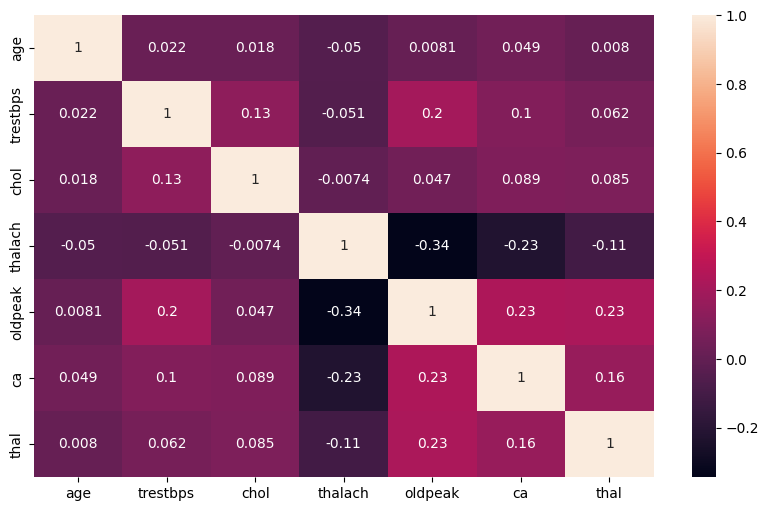

In [14]:
# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(data=hypertension.corr("pearson"),  annot = True)

Con la matriz de correlación y el mapa de calor puede evidenciarse correlaciones bastante débiles (con valores cercanos a cero y colores oscuros) entre la mayoría de las variables. La correlación más evidente se presenta entre las variables que miden la frecuencia cardiaca máxima alcanzada (thalach) y la depresión del dolor de garganta legopedia, con un valor de correlación de Pearson de -0.34, indicando una correlación negativa moderada.

### ¿Cómo está distribuida la población respecto a la enfermedad como variable objetivo?

Es también interesante analizar la cantidad de unidades muestrales (pacientes) que sufren hipertensión versus aquellos que no lo hacen, la salida del siguiente código muestra que de los 26058 paciente registrados, 14274 sufren hipertensión y 11784 no lo hacen.

In [15]:
cant_target = pd.DataFrame(hypertension['target'].value_counts())
cant_target.index = ("Hipertenso", "No Hipertenso")
print(cant_target)

               target
Hipertenso      14274
No Hipertenso   11784


El siguiente gráfico permite realizar la comparación:

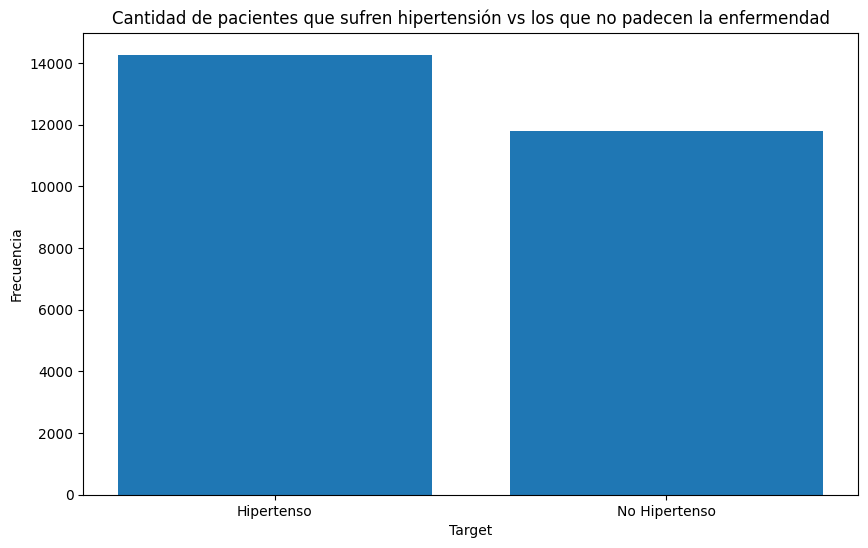

In [16]:
plt.figure(figsize=(10,6))
plt.bar(cant_target.index, cant_target.target)
plt.title("Cantidad de pacientes que sufren hipertensión vs los que no padecen la enfermendad")
plt.ylabel("Frecuencia")
plt.xlabel("Target")
plt.show()

Ahora, es de interés analizar la cantidad de personas con hipertensión y sin hipertensión de acuerdo al sexo.

### Cómo se comporta la variable objetivo respecto al sexo de los pacientes?

In [17]:
data_crosstab = pd.crosstab(hypertension['sex'],
                            hypertension['target'], 
                               margins = False)
print(data_crosstab)

target     0     1
sex               
0.0     5892  7137
1.0     5892  7137


[Text(0, 0, 'No'), Text(1, 0, 'Sí')]

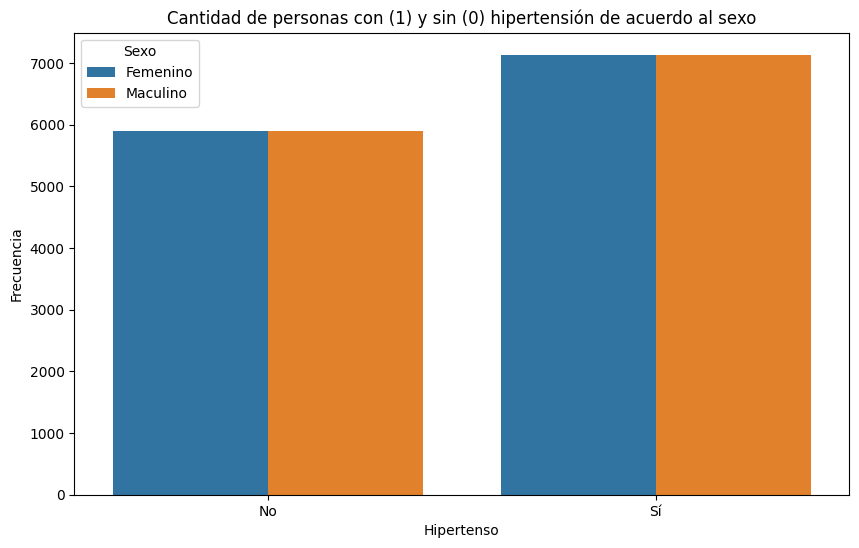

In [18]:
plt.figure(figsize=(10,6))
count_plt = sns.countplot(x='target', data=hypertension, hue = "sex")
count_plt.legend(loc='upper left',title='Sexo', labels = ("Femenino", "Maculino"))
count_plt.set(xlabel='Hipertenso', ylabel='Frecuencia')
plt.title("Cantidad de personas con (1) y sin (0) hipertensión de acuerdo al sexo")
count_plt.set_xticklabels(['No', 'Sí'])

Las salidas anteriores permiten concluir que la cantidad de hombres y mujeres con hipertensión es la misma: 7137 hombres y 7137 mujeres; este comportamiento se repite con las personas que no tienen hipertensión: 5892 hombres y 5892 mujeres.

### ¿Cómo es el comportamiento de las variables continuas por si solas?

Se procede ahora al análisis gráfico de las variables continuas mediante boxplots:

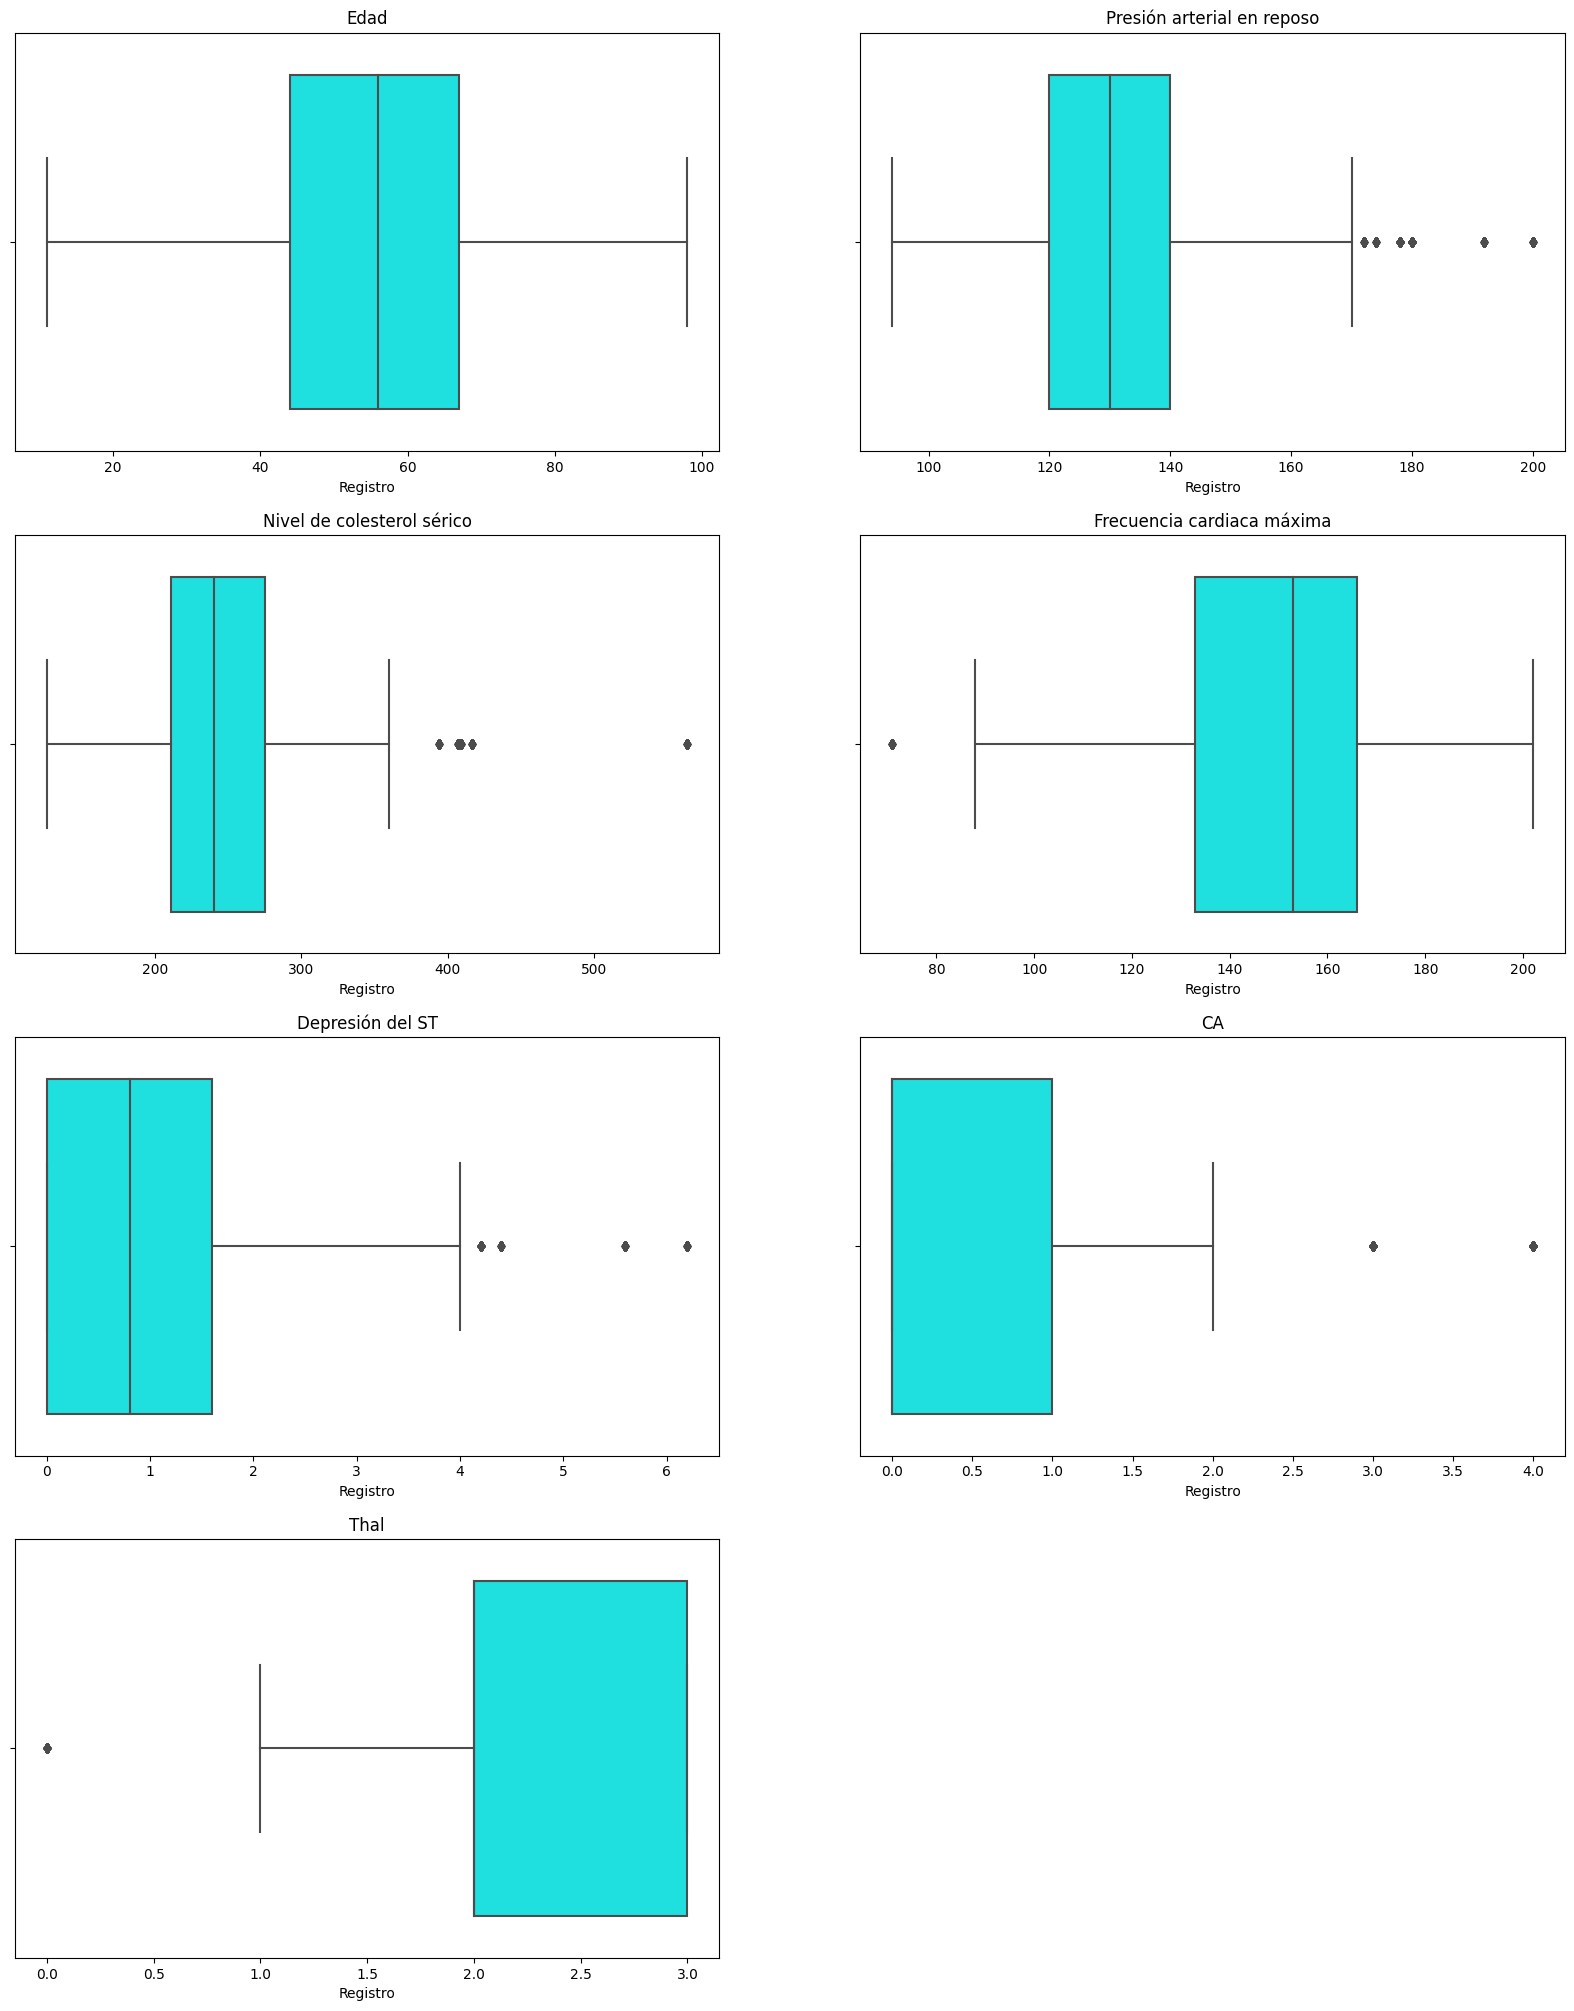

In [19]:
df_boxplot = hypertension[["age", "trestbps", "chol", "thalach","oldpeak", "ca", "thal"]]
name_boxplot = ["Edad", "Presión arterial en reposo", "Nivel de colesterol sérico", "Frecuencia cardiaca máxima","Depresión del ST", "CA", "Thal"]
plt.figure(figsize=(20,25))
for i,j in zip(range(7),df_boxplot.columns):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df_boxplot[j],orient='v',color='cyan')
  plt.title(name_boxplot[i])
  plt.xlabel('Registro')


El conjunto de boxplots anterior permite concluir que las variables: presión arterial en reposo, colesterol sérico, frecuencia cardiaca máxima, depresión del ST, CA y Thal registran valores atípicos cuyo análisis sería de particular interés.

Por otro lado,las variables colesterol sérico y frecuencia cardiaca máxima son las que mayor dispersión en sus registros presentan, mientras que las variables CA y Thal son las variables que presentan observaciones más parecidas entre sí. 

La variable edad parece tener una distribución bastante simétrica, a diferencia del resto de variables.

### Y ¿cómo se comportan entre sí?

Ahora, ¿qué pasa con las variables que demuestran una correlación moderada?
Para responder a esta pregunta se propone un gráfico de dispersión entre las variables frecuencia cardiaca máxima y depresión del ST, así:

Text(0, 0.5, 'Depresión del ST')

<Figure size 2000x2500 with 0 Axes>

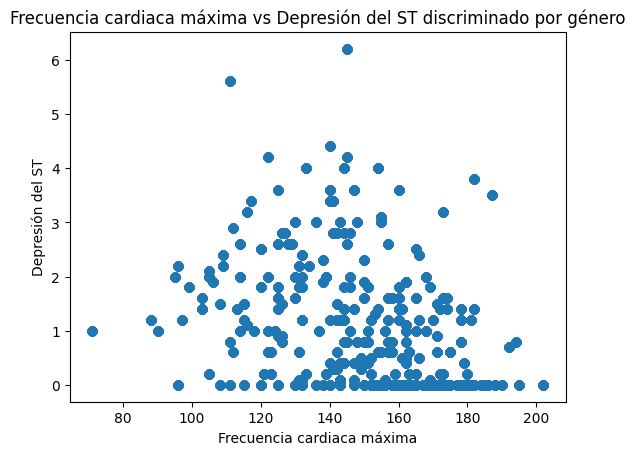

In [20]:
plt.figure(figsize=(20,25))
fig, ax = plt.subplots()
ax.scatter(hypertension.thalach, hypertension.oldpeak)
plt.title("Frecuencia cardiaca máxima vs Depresión del ST discriminado por género")
plt.xlabel("Frecuencia cardiaca máxima")
plt.ylabel("Depresión del ST")

De manera gráfica no es posible observar un patrón claro de comportamiento, sin embargo si se pueden observar algunos datos atípicos que pueden ser de particular interés más adelante.

¿Qué pasa con el gráfico anterior si se discrimina por sexo?

<Figure size 2000x2500 with 0 Axes>

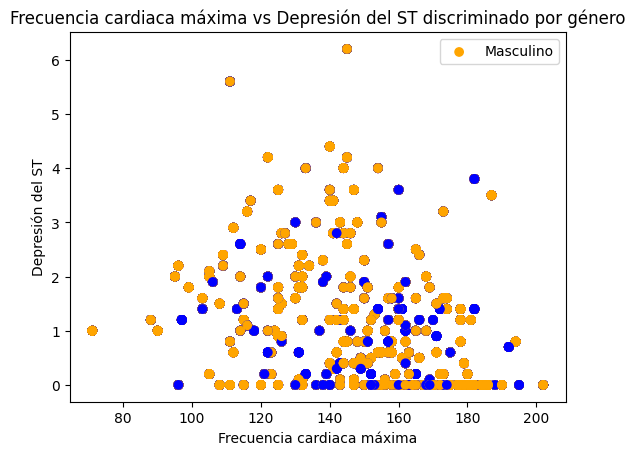

In [22]:
plt.figure(figsize=(20,25))
fig, ax = plt.subplots()
hypertension["sex"] = hypertension["sex"].astype("string")
colors = {'1.0':'orange', '0.0':'blue'}
ax.scatter(hypertension.thalach, hypertension.oldpeak, c=hypertension['sex'].map(colors))
plt.title("Frecuencia cardiaca máxima vs Depresión del ST discriminado por género")
plt.xlabel("Frecuencia cardiaca máxima")
plt.ylabel("Depresión del ST")
# Function add a legend  
plt.legend(["Masculino", "Femenino"], loc ="upper right")

Los hombres (color naranja) parecen registrar los datos máximos en ambas variables y presentar mayor dispersión en cuanto a los registros de las mujeres (color azul).

### Y respecto a la variable objetivo, ¿cómo es el comportamiento de algunas variables continuas?

Ahora, ¿cómo se comporta gráficamente la variable objetivo *target* (hipertensión o no) respecto a algunas variables continuas)

[Text(0, 0, 'Sí'), Text(0, 0, 'No')]

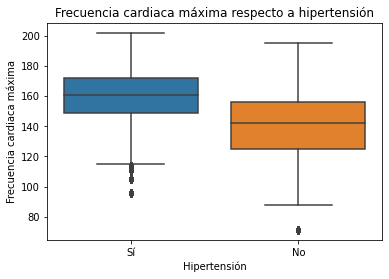

In [ ]:
tar_thalac = sns.boxplot(x = "target", y = "thalach", data = hypertension)
plt.title("Frecuencia cardiaca máxima respecto a hipertensión")
plt.xlabel("Hipertensión")
plt.ylabel("Frecuencia cardiaca máxima")
tar_thalac.set_xticklabels(['Sí', 'No'])

En promedio, es mayor la frecuencia cardiaca máxima alcanzada por los pacientes que sufren hipertensión (¡Algo lógico!)

[Text(0, 0, 'Sí'), Text(0, 0, 'No')]

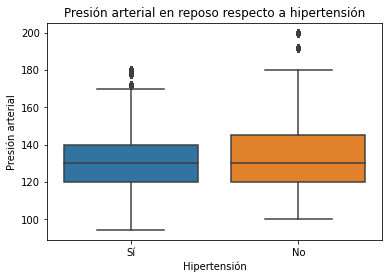

In [ ]:
ab = sns.boxplot(x = "target", y = "trestbps", data = hypertension)
plt.title("Presión arterial en reposo respecto a hipertensión")
plt.xlabel("Hipertensión")
plt.ylabel("Presión arterial")
ab.set_xticklabels(['Sí', 'No'])

En cuanto a la presión arterial, en promedio no parece haber diferencias entre las personas que padecen hipertensión y quienes no la padecen.

[Text(0, 0, 'Sí'), Text(0, 0, 'No')]

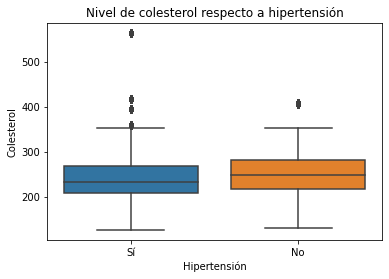

In [ ]:
abc = sns.boxplot(x = "target", y = "chol", data = hypertension)
plt.title("Nivel de colesterol respecto a hipertensión")
plt.xlabel("Hipertensión")
plt.ylabel("Colesterol")
abc.set_xticklabels(['Sí', 'No'])

No parece haber diferencias, en promedio en el nivel de colesterol entre las personas que sufren hipertensión y las que sí, sin embargo, algunas personas que padecen la enfermedad parecen presentan mayores niveles de colesterol cérico

## Conclusiones

- No parece presentarse correlaciones significativas entre las variables continuas, sin embargo se evidencian algunos comportamientos que pueden ser de gran interés.
- La librería *seaborn* es mucho más amigable con el usuario por su simplicidad, además si se combina con *matplotlib* son de gran utilidad.
- Como tarea futura queda desarrollar análisis de comportamientos entre dos o más variables, por ahora este breve análisis gráfico deja preguntas importantes.